1679923530-8258.avif

The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., logistic). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Dataset link-https://drive.google.com/file/d/1KEkAqdwojbLEjoafTvUt-LCcBqf8imQk/view?usp=sharing

#load the ness..

#load the datataset

#EDA-->EACH AND EVERY THING IN DETAILS

#Feature eng.--> encoding and rescaling

#Feature selection--> using any 3

#model building--. log

# model evalution--> prediction

#model deployment

In [ ]:
import pandas as pd   #data manipulation
import numpy as np   #NUMERICAL PYTHON

In [ ]:
data=pd.read_csv('/content/bank-additional-full-1 (1).csv')
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [ ]:
data=pd.read_csv('/content/bank-additional-full-1 (1).csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.00,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57.00,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37.00,services,married,high.school,no,yes,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40.00,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56.00,services,married,high.school,no,no,yes,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no


**bank client data**:

1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')


5 - default: has credit in default? (categorical: 'no','yes','unknown')


6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:


8 - contact: contact communication type (categorical: 'cellular','telephone')


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')


10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


other attributes:


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14 - previous: number of contacts performed before this campaign and for this client (numeric)


15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes


16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):


21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



EDA

In [ ]:
data.shape

(41199, 21)

In [ ]:
data.info()    #DATA INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,195.00","41,196.00","41,196.00","41,196.00","41,196.00","41,196.00","41,195.00","41,196.00","41,196.00","41,196.00"
mean,40.03,258.28,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,"5,167.00"
std,10.43,259.25,2.77,186.89,0.49,1.57,0.58,4.63,1.73,72.30
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,"4,963.60"
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,"5,099.10"
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,"5,191.00"
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,"5,228.10"
max,98.00,"4,918.00",56.00,999.00,7.00,1.40,94.77,-26.90,5.04,"5,228.10"


In [ ]:
Q1=32
Q3=47
IQR=Q3-Q1
uf=Q3+1.5*(IQR)
uf
LF=Q1-1.5*(IQR)
LF

9.5

#### **Summary Statistics** (for Numerical Features):

1. **age**:
   - **Count**: 41,195 entries, indicating that this column has no missing values.
   - **Mean**: 40.03 years, suggesting that the average age of individuals in the dataset is around 40 years.
   - **Standard Deviation (std)**: 10.43 years, indicating moderate variability in the age of individuals.
   - **Minimum**: 17 years, showing that the youngest individual is 17 years old.
   - **25th Percentile (Q1)**: 32 years, which is the lower quartile where 25% of the individuals are younger than this age.
   - **50th Percentile (Median)**: 38 years, indicating that half of the individuals are younger than 38 years.
   - **75th Percentile (Q3)**: 47 years, suggesting that 75% of individuals are younger than 47 years.
   - **Maximum**: 98 years, with the oldest individual being 98 years old.

2. **duration** (the duration of the last contact in seconds):
   - **Count**: 41,196 entries, confirming no missing values.
   - **Mean**: 258.28 seconds (approximately 4 minutes and 18 seconds), representing the average duration of calls made.
   - **Standard Deviation (std)**: 259.25 seconds, showing considerable variability, indicating that some calls are much longer than the average.
   - **Minimum**: 0 seconds, which could be an issue with calls that didn’t last or possibly represent a data entry error.
   - **25th Percentile (Q1)**: 102 seconds, suggesting that 25% of the calls were shorter than 102 seconds.
   - **50th Percentile (Median)**: 180 seconds (3 minutes), implying that half of the calls lasted less than 3 minutes.
   - **75th Percentile (Q3)**: 319 seconds (around 5 minutes), indicating that 75% of calls lasted less than 5 minutes.
   - **Maximum**: 4,918 seconds (around 82 minutes), which is an unusually long duration, suggesting potential outliers or extreme cases.

3. **campaign** (number of contacts performed during this campaign):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 2.57 contacts, implying an average of approximately 2.5 contacts made per individual during the campaign.
   - **Standard Deviation (std)**: 2.77 contacts, showing a relatively wide spread in the number of contacts made.
   - **Minimum**: 1 contact, which is the fewest contacts made.
   - **25th Percentile (Q1)**: 1 contact, meaning that 25% of individuals were contacted only once.
   - **50th Percentile (Median)**: 2 contacts, indicating that half of the individuals were contacted at least twice.
   - **75th Percentile (Q3)**: 3 contacts, with 75% of individuals receiving 3 or fewer contacts.
   - **Maximum**: 56 contacts, suggesting the presence of a few outliers where certain individuals were contacted very frequently.

4. **pdays** (number of days since the last contact):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 962.48 days (around 2.6 years), representing the average number of days since the last contact for the individuals in the dataset.
   - **Standard Deviation (std)**: 186.89 days, indicating moderate variation in the number of days since the last contact.
   - **Minimum**: 0 days, implying that some individuals were contacted recently (even on the same day).
   - **25th Percentile (Q1)**: 999 days, which could be a data-specific indicator where values greater than 999 days might be treated as missing or unavailable, depending on the dataset.
   - **50th Percentile (Median)**: 999 days, suggesting a majority of individuals have not been contacted recently (values of 999 likely represent "unknown" or "not applicable").
   - **75th Percentile (Q3)**: 999 days, showing that three-quarters of individuals are in the same situation.
   - **Maximum**: 999 days, reinforcing that many values might be placeholders for missing or non-relevant data.

5. **previous** (number of contacts before this campaign):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 0.17 contacts, indicating that most individuals had few previous interactions before the current campaign.
   - **Standard Deviation (std)**: 0.49, showing that the number of previous contacts varies considerably.
   - **Minimum**: 0 contacts, meaning some individuals had no prior contact.
   - **25th Percentile (Q1)**: 0 contacts, suggesting that a significant proportion of individuals had no previous interactions.
   - **50th Percentile (Median)**: 0 contacts, confirming that half of the individuals had no prior contact.
   - **75th Percentile (Q3)**: 0 contacts, indicating that three-quarters of the individuals had zero previous contacts.
   - **Maximum**: 7 contacts, which seems reasonable given the nature of a marketing campaign, but still may indicate a few individuals with unusually high previous interactions.

---

#### **Economic and Financial Features**:
- **emp.var.rate** (employment variation rate):
   - **Mean**: 0.08, indicating that there is a small average fluctuation in employment rates.
   - **Standard Deviation**: 1.57, showing significant volatility in employment variation.
   - **Min/Max Range**: The range from -3.4 to 1.4 highlights the presence of extreme values in employment variations, which may be indicative of external economic factors.

- **cons.price.idx** (consumer price index):
   - **Mean**: 93.58, which seems to be around an index value representing price stability.
   - **Standard Deviation**: 0.58, showing minimal fluctuation.
   - **Min/Max Range**: The minimum and maximum values (92.20 to 94.77) suggest that the consumer price index in this dataset is quite stable.

- **cons.conf.idx** (consumer confidence index):
   - **Mean**: -40.50, indicating an overall low consumer confidence in the dataset (possibly in a recessionary environment).
   - **Standard Deviation**: 4.63, showing some variability in consumer confidence.
   - **Min/Max Range**: The range from -50.80 to -26.90 shows negative confidence scores, typical of an economic downturn.

- **euribor3m** (3-month Euribor rate):
   - **Mean**: 3.62%, indicating the average short-term interest rate.
   - **Standard Deviation**: 1.73%, showing some variability in interest rates.
   - **Min/Max Range**: The range from 0.63% to 5.04% suggests some fluctuation in the Euribor rate during the time frame of the data collection.

- **nr.employed** (number of employees):
   - **Mean**: 5,167, suggesting the average number of employees in the dataset.
   - **Standard Deviation**: 72, indicating slight variation in the number of employees across observations.
   - **Min/Max Range**: The range from 4,963 to 5,228 shows relatively stable employment numbers, with a slight variation in the workforce.

---

### Key Insights:
1. **Data Distribution**: The dataset contains both continuous and categorical features with considerable variability, especially in columns like `duration`, `campaign`, and `previous`.
2. **Outliers**: Some features, such as `duration` (with a maximum of 4918 seconds) and `campaign` (with a maximum of 56 contacts), exhibit potential outliers that may need further exploration.
3. **Economic Context**: Financial and economic features (`emp.var.rate`, `cons.price.idx`, etc.) suggest a period of economic instability, with negative consumer confidence and significant employment rate variation.

This statistical summary allows you to get an overall sense of the data and guides your further analysis, such as identifying anomalies, testing hypotheses, and preparing the data for modeling.



In [ ]:
data.describe(include="O")  #O stand for object column

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41194,41194,41194,41195,41196,41195,41195,41196,41196,41194,41196
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24934,12168,32595,21584,33957,26151,13769,8623,35563,36556


In [ ]:
data.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,"41,195.00",41194,41194,41194,41195,41196,41195,41195,41196,41196,...,"41,196.00","41,196.00","41,196.00",41194,"41,196.00","41,195.00","41,196.00","41,196.00","41,196.00",41196
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36556
mean,40.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.57,962.48,0.17,NaN,0.08,93.58,-40.50,3.62,"5,167.00",NaN
std,10.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.77,186.89,0.49,NaN,1.57,0.58,4.63,1.73,72.30,NaN
min,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,0.00,0.00,NaN,-3.40,92.20,-50.80,0.63,"4,963.60",NaN
25%,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,999.00,0.00,NaN,-1.80,93.08,-42.70,1.34,"5,099.10",NaN
50%,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,999.00,0.00,NaN,1.10,93.75,-41.80,4.86,"5,191.00",NaN
75%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.00,999.00,0.00,NaN,1.40,93.99,-36.40,4.96,"5,228.10",NaN



#### **Summary Statistics for Categorical Features:**


---

1. **job** (type of job):
   - **Count**: 41,194 entries, confirming there are no missing values in this column.
   - **Unique**: 12 distinct job types, showing the diversity in the types of jobs in the dataset.
   - **Top**: `admin.`, which is the most common job type.
   - **Freq**: 10,422 occurrences of `admin.`, meaning this is the most frequent job type in the dataset.

2. **marital** (marital status):
   - **Count**: 41,194 entries, no missing values.
   - **Unique**: 4 different marital statuses.
   - **Top**: `married`, indicating the most common marital status in the dataset.
   - **Freq**: 24,934 occurrences of `married`, suggesting that a majority of individuals are married.

3. **education** (level of education):
   - **Count**: 41,194 entries, no missing values.
   - **Unique**: 8 distinct education levels.
   - **Top**: `university.degree`, which is the most common education level.
   - **Freq**: 12,168 occurrences of `university.degree`, meaning that a significant proportion of individuals have a university degree.

4. **default** (whether the individual has credit in default):
   - **Count**: 41,195 entries, suggesting one missing value in this column.
   - **Unique**: 3 possible categories (`yes`, `no`, and likely `unknown`).
   - **Top**: `no`, indicating that most individuals do not have credit in default.
   - **Freq**: 32,595 occurrences of `no`, showing that the majority of individuals are not in default.

5. **housing** (whether the individual has a housing loan):
   - **Count**: 41,196 entries, confirming no missing values.
   - **Unique**: 3 categories (`yes`, `no`, `unknown`).
   - **Top**: `yes`, which is the most common response.
   - **Freq**: 21,584 occurrences of `yes`, showing that most individuals have a housing loan.

6. **loan** (whether the individual has a personal loan):
   - **Count**: 41,195 entries, indicating one missing value in this column.
   - **Unique**: 3 categories (`yes`, `no`, `unknown`).
   - **Top**: `no`, indicating that the majority of individuals do not have a personal loan.
   - **Freq**: 33,957 occurrences of `no`, suggesting that most individuals do not have a personal loan.

7. **contact** (communication type used to contact the individual):
   - **Count**: 41,195 entries, no missing values.
   - **Unique**: 2 categories (`cellular`, `telephone`).
   - **Top**: `cellular`, the most common contact type.
   - **Freq**: 26,151 occurrences of `cellular`, meaning that most individuals were contacted by phone (cellular).

8. **month** (last contact month):
   - **Count**: 41,196 entries, no missing values.
   - **Unique**: 10 months, representing the different months in which individuals were contacted.
   - **Top**: `may`, the month with the highest frequency of contacts.
   - **Freq**: 13,769 occurrences of `may`, showing that May was the most common month for contact.

9. **day_of_week** (day of the week of the last contact):
   - **Count**: 41,196 entries, confirming no missing values.
   - **Unique**: 5 days of the week (`mon`, `tue`, `wed`, `thu`, `fri`).
   - **Top**: `thu` (Thursday), the most common day for contacts.
   - **Freq**: 8,623 occurrences of `thu`, suggesting that Thursday is the most common day for contact.

10. **poutcome** (outcome of the previous marketing campaign):
    - **Count**: 41,194 entries, with some missing data.
    - **Unique**: 3 possible outcomes (`nonexistent`, `failure`, `success`).
    - **Top**: `nonexistent`, meaning that the majority of individuals did not have any outcome from the previous marketing campaign.
    - **Freq**: 35,563 occurrences of `nonexistent`, indicating that most individuals were either not contacted in the previous campaign or had no outcome.

11. **y** (whether the individual subscribed to the term deposit, i.e., target variable):
    - **Count**: 41,196 entries, no missing values.
    - **Unique**: 2 categories (`yes`, `no`), with `yes` indicating that the individual subscribed and `no` indicating that they did not.
    - **Top**: `no`, the most common response, meaning that most individuals did not subscribe to the term deposit.
    - **Freq**: 36,556 occurrences of `no`, which represents a substantial majority of the dataset.

---

### Key Insights from the Categorical Data:

- **Imbalance in Target Variable (`y`)**: There is a clear class imbalance in the target variable `y`, where `no` (did not subscribe) is much more frequent than `yes` (subscribed). This is an important aspect to consider for modeling, as class imbalance can affect the performance of machine learning algorithms.
  
- **Common Job Types**: `admin.` is the most common job type, followed by other job categories like `blue-collar` and `technician`.

- **Marital Status**: Most individuals are `married`, which could influence their response to the campaign (perhaps due to family-related financial decisions).

- **Education**: A large proportion of individuals have a `university.degree`, indicating a relatively high level of education in the dataset.

- **Credit and Loans**: Most individuals do not have credit in default (`default = no`) and do not have personal loans (`loan = no`), but a significant portion does have a housing loan (`housing = yes`).

- **Contact Information**: The majority of individuals were contacted via `cellular` phone, indicating the preferred method of contact for this dataset.

- **Timing of Contact**: The most common contact month is `May`, with Thursday (`thu`) being the most frequent day for contact.

- **Outcome of Previous Campaign**: The majority of individuals have no recorded outcome from the previous campaign (`poutcome = nonexistent`), which could suggest that the previous campaign was either not very successful or that data on previous outcomes was not collected for many individuals.



100
80-- YES
20--NO---OVERSAMPLING(60)


160
80--
80--



UNDERSAMPLING
40
20--
20--

In [ ]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

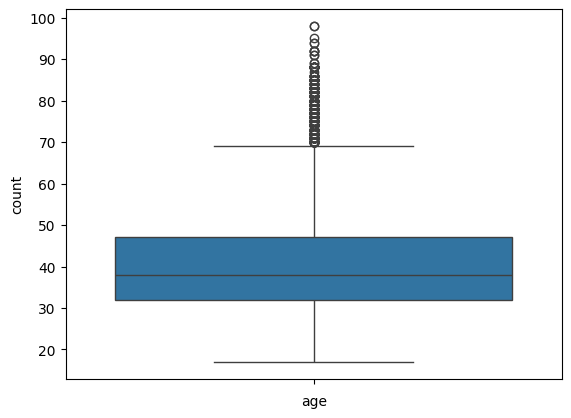

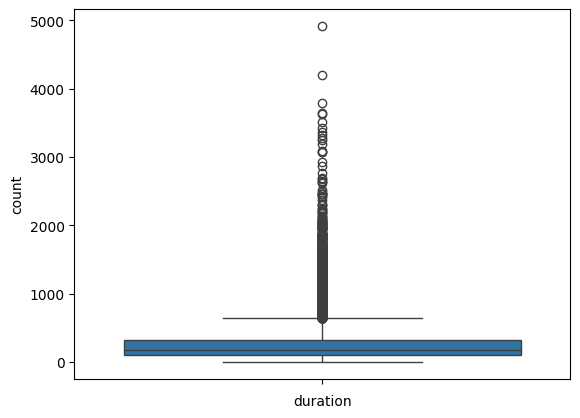

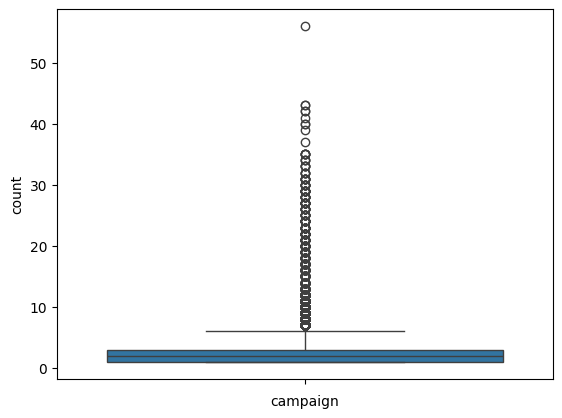

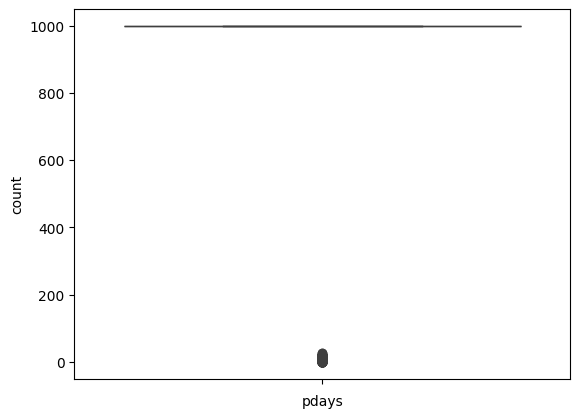

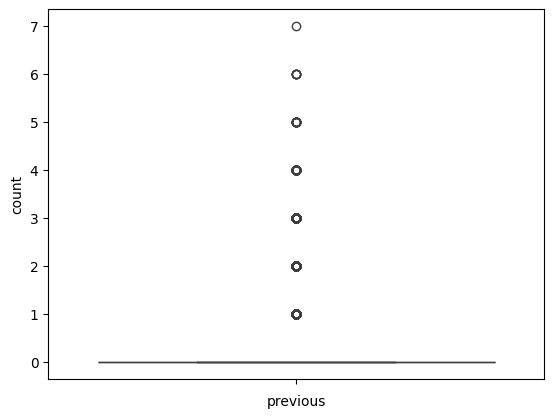

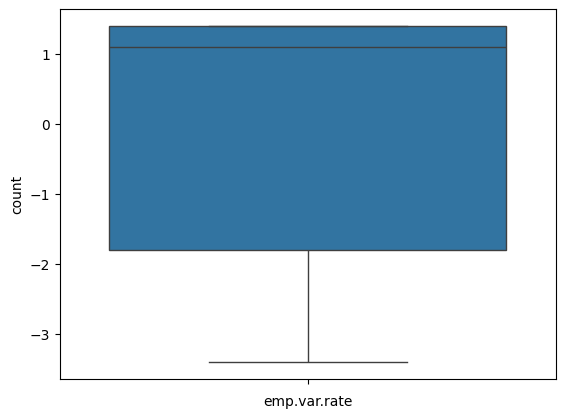

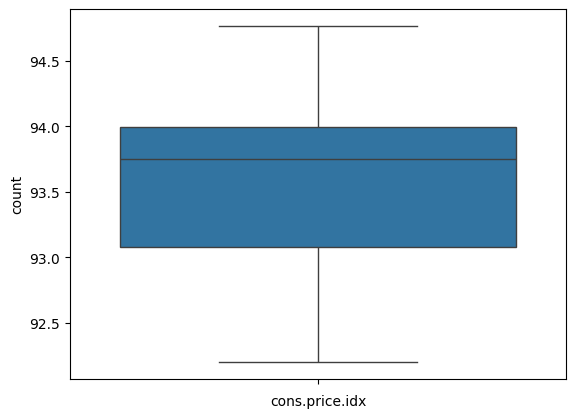

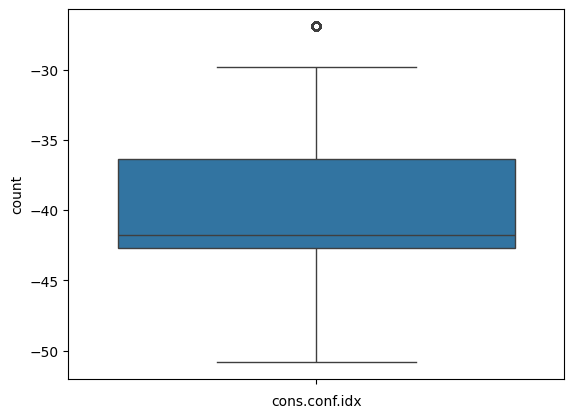

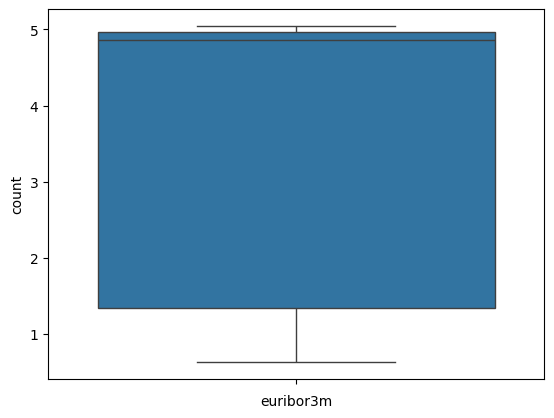

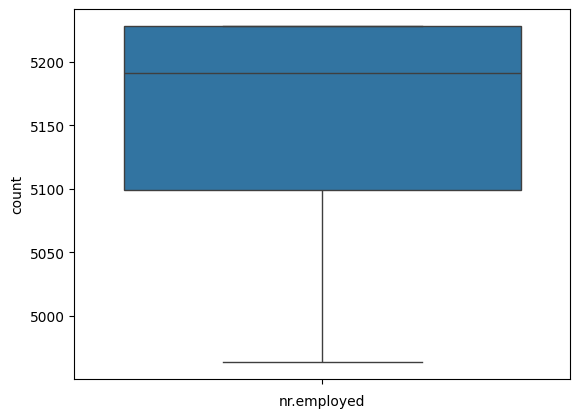

In [ ]:
import seaborn as sns  #visual
import matplotlib.pyplot as plt  #visual
for col_name in col:    #
  if(data[col_name].dtypes!='object'):
    sns.boxplot(data[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [ ]:
import plotly.express as px

numical_cols=data.select_dtypes(include=['int64','float64']).columns.tolist()
for col_name in numical_cols:
  fig=px.box(data,col_name)
  fig.update_layout(xaxis_title=col_name,yaxis_title='count')
  fig.show()

In [ ]:
 fig=px.box(data,'age')
 #fig.update_layout(xaxis_title='age',yaxis_title='count')
 fig.show()

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.00,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57.00,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37.00,services,married,high.school,no,yes,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40.00,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56.00,services,married,high.school,no,no,yes,telephone,may,mon,...,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.00,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.00,999.00,1.00,failure,-1.10,94.77,-50.80,1.03,"4,963.60",no
41195,74.00,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.00,999.00,1.00,failure,-1.10,94.77,-50.80,1.03,"4,963.60",no
41196,74.00,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.00,999.00,1.00,failure,-1.10,94.77,-50.80,1.03,"4,963.60",no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig=px.bar(data,x='marital',title='marital status')
fig.update_layout(width=800,
                  height=400,plot_bgcolor='lightgray')
fig.show()

In [ ]:
numical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

With reference to the above plot we can observe that some columns are having outliers .
So what actually outliers are  ,The values greater than upper limit and values lesser than lower limit .

Consider for age column
where  1st quantile /25th percentile value(Q1)  and 3rd quantile /75th percentile value(Q3)values are
data.age.quantile(.25),data.age.quantile(.75)=(32.0, 47.0)

With the help of Q1 and Q3 we will be finding out Inter Quantile Range (IQR) for Outlier analysis

Lets start with  age column

1.age

There are outliers

2.duration

There are outliers

3.campaign

There are outliers

4.pdays

There are no outliers

5.previous

There are no outliers

6.emp.var.rate

There are no outliers

7.cons.price.idx

There are no outliers

8.cons.conf.idx

There are  outliers

9.nr.employed

There are no outliers

so from above inference only 4 columns as outliers those are 'age','duration','campaign','cons.conf.idx' .
So in next step we'll be handling it,


# IQR method

Now with the IQR method we will be removing the outlier


The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median


(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR
upper limit=Q3+1.5*IQR

so consider for age column

Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

(9.5 , 69.5)

so we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all 4 ('age','duration','campaign','cons.conf.idx' ) columns.

In [ ]:
#handling outliers

col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

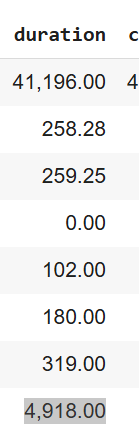

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"35,176.00","35,176.00","35,176.00","35,176.00","35,176.00","35,176.00","35,176.00","35,176.00","35,176.00","35,176.00"
mean,39.58,206.67,2.05,964.96,0.17,0.10,93.58,-40.66,3.64,"5,168.22"
std,9.64,140.11,1.29,180.68,0.49,1.54,0.57,4.44,1.72,70.24
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,"4,963.60"
25%,32.00,101.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.35,"5,099.10"
50%,38.00,170.00,2.00,999.00,0.00,1.10,93.44,-41.80,4.86,"5,191.00"
75%,47.00,280.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,"5,228.10"
max,69.00,644.00,6.00,999.00,7.00,1.40,94.77,-29.80,5.04,"5,228.10"


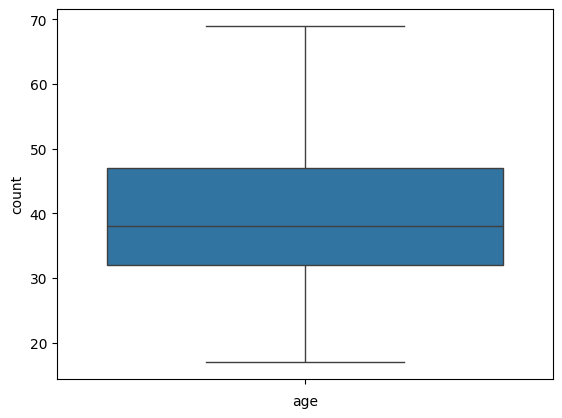

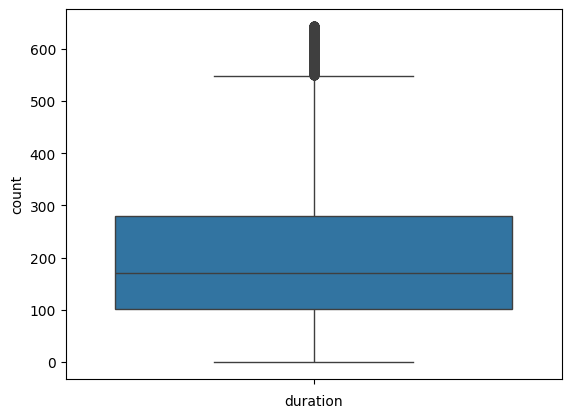

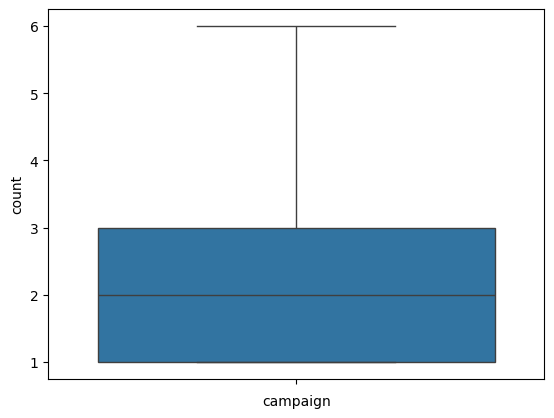

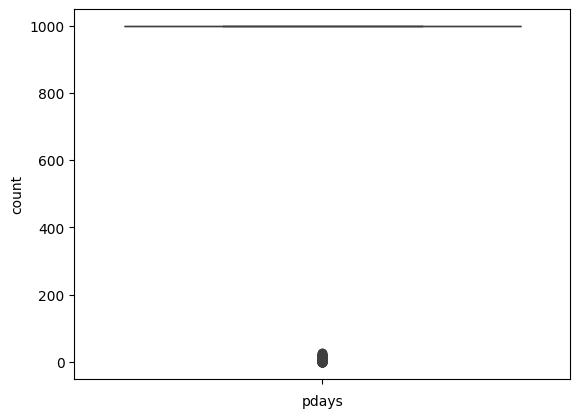

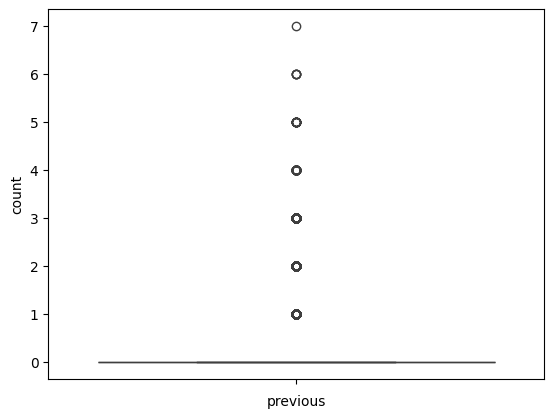

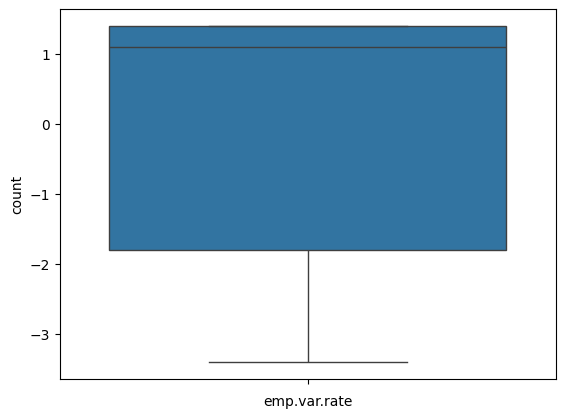

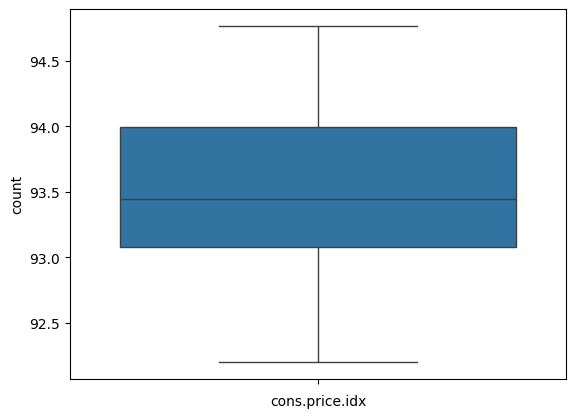

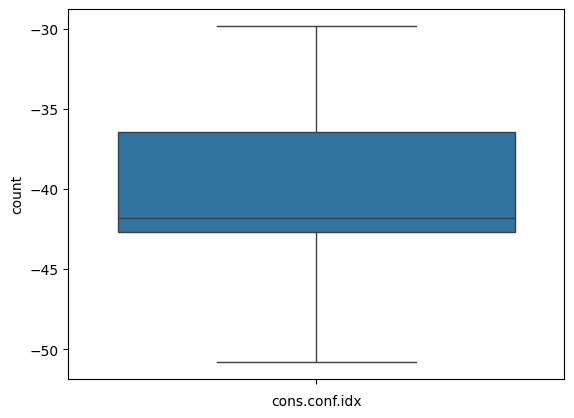

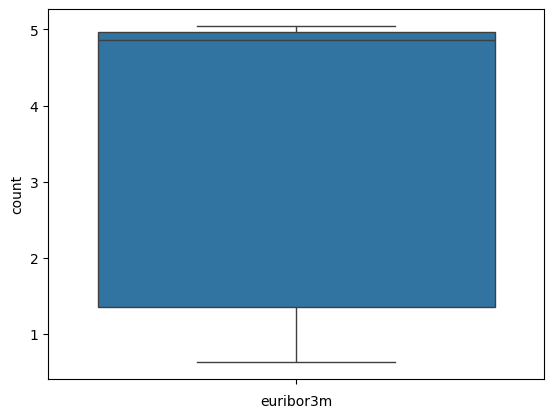

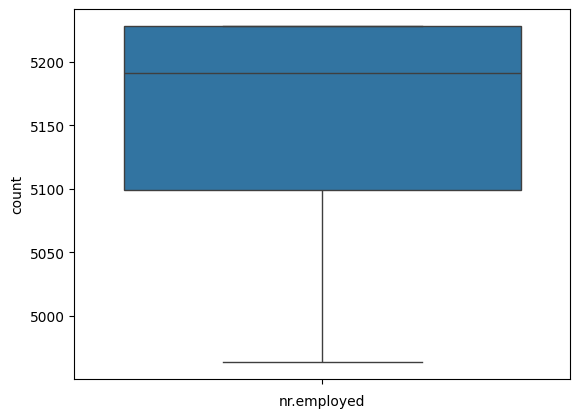

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

From the above box plot we can visualize that all the outliers have been removed .

In [ ]:
import pandas as pd

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(data)
report.show_html('harsh_logitic_report1.html')

                                             |          | [  0%]   00:00 -> (? left)

Report harsh_logitic_report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
AV = AutoViz_Class()
report = AV.AutoViz(data)

Shape of your Data Set loaded: (35176, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    21 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 11 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,float64,0.000000,NA,17.000000,69.000000,No issue
job,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
marital,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
education,object,0.000000,0,,,1 rare categories: ['illiterate']. Group them into a single category or drop the categories.
default,object,0.000000,0,,,1 rare categories: ['yes']. Group them into a single category or drop the categories.
housing,object,0.000000,0,,,No issue
loan,object,0.000000,0,,,No issue
contact,object,0.000000,0,,,No issue
month,object,0.000000,0,,,"2 rare categories: ['oct', 'dec']. Group them into a single category or drop the categories."
day_of_week,object,0.000000,0,,,No issue


Number of All Scatter Plots = 55
All Plots done
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [ ]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
data['y'] = np.where(data['y'] == 'yes',1,0)

In [ ]:
data['y'] = data['y'].astype(str)

In [ ]:
data.dtypes

,0
age,float64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
#taking all columns in single list
col_list = list(data.columns)

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

using for loop we are replacing all the null/na values with mean/median and mode for numerical
and categorical values respectively

Missing values can be replaced in two ways based on thier data type.

If colums are numerical we'll be replacing it by either mean /median .

If columns are object format or string we'll be replacing value by mode .

In [ ]:

for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

after replacing with mean/median and mode ,we can check for the null values again and check the result

# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.



Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.




bins = [0, 50, 100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [ ]:
data['age'].value_counts()/len(data['age'])

,count
age,
31.0,0.048129
32.0,0.044917
33.0,0.044917
35.0,0.043723
36.0,0.043467
34.0,0.043439
30.0,0.041449
37.0,0.036019
29.0,0.035649


In [ ]:
data.age.value_counts()

,count
age,
31.0,1693
32.0,1580
33.0,1580
35.0,1538
36.0,1529
34.0,1528
30.0,1458
37.0,1267
29.0,1254


# 1.Chi-Square test

Chi-Square test is normally done on Categorical data(object) ,where we will select each independent attribute and calculating chi-Square statistics value with the help of  observed value and expected value.

if observed and expected values are close then we'll have high chi-square statistics.(high chi-square stats implies attributes are highly independent)
if observed and expected values are far then we'll have less chi-square statistics.(less chi-square stats implies attributes are  not independent)

With the above concept we'll set null and alternative hypothesis and check for its acceptance or rejection through p-value and alpha value (significance value)

if p -value > alpha value ,we reject null hypothesis
if p-value  < alpha value ,we accept null hypothesis

from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency

###Chisq Test for Independence
dataset_table=pd.crosstab(data['age'],data['y'])
print(dataset_table)

In [ ]:
dataset_table=pd.crosstab(data['age'],data['y'])
print(dataset_table)

y        0    1
age            
17.0     3    1
18.0    16   11
19.0    21   19
20.0    36   22
21.0    67   20
22.0    87   26
23.0   158   33
24.0   334   53
25.0   434   65
26.0   513   87
27.0   665   81
28.0   776  103
29.0  1131  123
30.0  1335  123
31.0  1559  134
32.0  1480  100
33.0  1462  118
34.0  1408  120
35.0  1442   96
36.0  1438   91
37.0  1184   83
38.0  1146   87
39.0  1183   69
40.0   976   44
41.0  1050   68
42.0   948   45
43.0   854   41
44.0   843   36
45.0   899   45
46.0   853   47
47.0   772   37
48.0   781   56
49.0   699   33
50.0   695   45
51.0   624   48
52.0   625   49
53.0   584   41
54.0   551   39
55.0   528   25
56.0   552   52
57.0   515   38
58.0   463   38
59.0   346   41
60.0   196   43
61.0    34   27
62.0    34   22
63.0    33   14
64.0    28   21
65.0    17   19
66.0    26   21
67.0    12    9
68.0    14   12
69.0    15   10


In [ ]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency

###Chisq Test for Independence
dataset_table=pd.crosstab(data['age'],data['y'])
print(dataset_table)

y        0    1
age            
17.0     3    1
18.0    16   11
19.0    21   19
20.0    36   22
21.0    67   20
22.0    87   26
23.0   158   33
24.0   334   53
25.0   434   65
26.0   513   87
27.0   665   81
28.0   776  103
29.0  1131  123
30.0  1335  123
31.0  1559  134
32.0  1480  100
33.0  1462  118
34.0  1408  120
35.0  1442   96
36.0  1438   91
37.0  1184   83
38.0  1146   87
39.0  1183   69
40.0   976   44
41.0  1050   68
42.0   948   45
43.0   854   41
44.0   843   36
45.0   899   45
46.0   853   47
47.0   772   37
48.0   781   56
49.0   699   33
50.0   695   45
51.0   624   48
52.0   625   49
53.0   584   41
54.0   551   39
55.0   528   25
56.0   552   52
57.0   515   38
58.0   463   38
59.0   346   41
60.0   196   43
61.0    34   27
62.0    34   22
63.0    33   14
64.0    28   21
65.0    17   19
66.0    26   21
67.0    12    9
68.0    14   12
69.0    15   10


In [ ]:
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[   3    1]
 [  16   11]
 [  21   19]
 [  36   22]
 [  67   20]
 [  87   26]
 [ 158   33]
 [ 334   53]
 [ 434   65]
 [ 513   87]
 [ 665   81]
 [ 776  103]
 [1131  123]
 [1335  123]
 [1559  134]
 [1480  100]
 [1462  118]
 [1408  120]
 [1442   96]
 [1438   91]
 [1184   83]
 [1146   87]
 [1183   69]
 [ 976   44]
 [1050   68]
 [ 948   45]
 [ 854   41]
 [ 843   36]
 [ 899   45]
 [ 853   47]
 [ 772   37]
 [ 781   56]
 [ 699   33]
 [ 695   45]
 [ 624   48]
 [ 625   49]
 [ 584   41]
 [ 551   39]
 [ 528   25]
 [ 552   52]
 [ 515   38]
 [ 463   38]
 [ 346   41]
 [ 196   43]
 [  34   27]
 [  34   22]
 [  33   14]
 [  28   21]
 [  17   19]
 [  26   21]
 [  12    9]
 [  14   12]
 [  15   10]]


In [ ]:
val=chi2_contingency(dataset_table)
val
#dof=degree of freedom

Chi2ContingencyResult(statistic=1224.0574667524122, pvalue=4.9662548492304214e-222, dof=52, expected_freq=array([[3.68944735e+00, 3.10552650e-01],
       [2.49037696e+01, 2.09623038e+00],
       [3.68944735e+01, 3.10552650e+00],
       [5.34969866e+01, 4.50301342e+00],
       [8.02454799e+01, 6.75452013e+00],
       [1.04226888e+02, 8.77311235e+00],
       [1.76171111e+02, 1.48288890e+01],
       [3.56954031e+02, 3.00459688e+01],
       [4.60258557e+02, 3.87414430e+01],
       [5.53417103e+02, 4.65828974e+01],
       [6.88081931e+02, 5.79180691e+01],
       [8.10756055e+02, 6.82439447e+01],
       [1.15664174e+03, 9.73582556e+01],
       [1.34480356e+03, 1.13196441e+02],
       [1.56155859e+03, 1.31441409e+02],
       [1.45733170e+03, 1.22668297e+02],
       [1.45733170e+03, 1.22668297e+02],
       [1.40936889e+03, 1.18631112e+02],
       [1.41859251e+03, 1.19407494e+02],
       [1.41029125e+03, 1.18708750e+02],
       [1.16863245e+03, 9.83675517e+01],
       [1.13727215e+03, 9.5727854

In [ ]:
#ex
#observed_value=[[1,15],
#                [20,25]]
#chi2,p,dof,expected=chi2_contingency(observed_value
  #                                   )


In [ ]:
#print(expected)

In [ ]:
#print(f'P-value: {p}')

In [ ]:
Expected_Values=val[3]
Expected_Values

array([[3.68944735e+00, 3.10552650e-01],
       [2.49037696e+01, 2.09623038e+00],
       [3.68944735e+01, 3.10552650e+00],
       [5.34969866e+01, 4.50301342e+00],
       [8.02454799e+01, 6.75452013e+00],
       [1.04226888e+02, 8.77311235e+00],
       [1.76171111e+02, 1.48288890e+01],
       [3.56954031e+02, 3.00459688e+01],
       [4.60258557e+02, 3.87414430e+01],
       [5.53417103e+02, 4.65828974e+01],
       [6.88081931e+02, 5.79180691e+01],
       [8.10756055e+02, 6.82439447e+01],
       [1.15664174e+03, 9.73582556e+01],
       [1.34480356e+03, 1.13196441e+02],
       [1.56155859e+03, 1.31441409e+02],
       [1.45733170e+03, 1.22668297e+02],
       [1.45733170e+03, 1.22668297e+02],
       [1.40936889e+03, 1.18631112e+02],
       [1.41859251e+03, 1.19407494e+02],
       [1.41029125e+03, 1.18708750e+02],
       [1.16863245e+03, 9.83675517e+01],
       [1.13727215e+03, 9.57278542e+01],
       [1.15479702e+03, 9.72029793e+01],
       [9.40809074e+02, 7.91909256e+01],
       [1.031200

In [ ]:
a=zip(Observed_Values,Expected_Values)

In [ ]:
a

statistic=1224.0574667524122

In [ ]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

1224.0574667524122

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 1


In [ ]:
#ex(zip_)
list1=[1,2,3]
list2=['a','b','c']
zipped=zip(list1,list2)
for item in zipped:
  print(item)

(1, 'a')
(2, 'b')
(3, 'c')


In [ ]:
alpha = 0.05
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 1224.0574667524122


In [ ]:
critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1


In [ ]:
import pandas as pd

# Assuming p_value is defined, e.g., p_value = 0.05
p_value = 0.05

# Create a dictionary with the data you want to append
di = {'Age': p_value}

# Create an empty DataFrame
df = pd.DataFrame()

# Append the dictionary using pd.concat (since append() is deprecated)
df = pd.concat([df, pd.DataFrame([di])], ignore_index=True)

print(df)


    Age
0  0.05


In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
###Chisq Test for Independence for all object fields
import scipy.stats as stats
# Assuming `data` is your DataFrame with the target variable 'y' and other features
col_list = list(data.columns)
col_list.remove('y')  # Exclude target column 'y'

# Initialize an empty DataFrame to store the feature names and p-values
df = pd.DataFrame(columns=['Feature', 'P-value'])

# Iterate over all features in col_list
for col in col_list:
    if data[col].dtype == 'object':  # Check if the column is categorical
        # Create a contingency table for the feature and the target variable
        dataset_table = pd.crosstab(data[col], data['y'])

        # Perform the Chi-squared test
        chi2_stat, p_value, dof, expected_values = stats.chi2_contingency(dataset_table)

        # Append the results to the DataFrame
        df = pd.concat([df, pd.DataFrame({'Feature': [col], 'P-value': [p_value]})], ignore_index=True)

# Display the results
print(df)


       Feature              P-value
0          job                 0.00
1      marital                 0.00
2    education                 0.00
3      default                 0.00
4      housing                 0.02
5         loan                 0.34
6      contact                 0.00
7        month                 0.00
8  day_of_week                 0.00
9     poutcome                 0.00


<ipython-input-54-30e280cbfef8>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



#so from above output we can see ,loan and housing attribute have p-value greater than alpha value so we'll be removing the attributes

In [ ]:
df=pd.DataFrame(columns=['Feature','P-value'])

In [ ]:
df = pd.concat([df, pd.DataFrame({'Feature': [col], 'P-value': [p_value]})], ignore_index=True)

<ipython-input-58-e1e95e28ceaf>:1: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [ ]:
data.drop(columns = ['loan','housing'],inplace = True)

In [ ]:
data.head()

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.00,housemaid,married,basic.4y,no,telephone,may,mon,261.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
1,57.00,services,married,high.school,unknown,telephone,may,mon,149.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
2,37.00,services,married,high.school,no,telephone,may,mon,226.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
3,40.00,admin.,married,basic.6y,no,telephone,may,mon,151.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
4,56.00,services,married,high.school,no,telephone,may,mon,307.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0


In [ ]:
data.shape

(35176, 19)

# IV analysis

# IV analysis

IV analysis is done on features to check the predictive power of features(independent attributes) by binning the values and calculating the weight of eveidence and finaly computing IV-Score which gives you the predictive power based on predefined range of IV-Score. below are the range of data

#Information Value 	        Predictive power

#<0.02	                     Useless

#0.02 to 0.1	             Weak predictors

#0.1 to 0.3	                 Medium Predictors

#0.3 to 0.5	                 Strong predictors

#>0.5	                     Suspicious

Note:before calculating the weight of evidence make sure to bin the features if they are not categorical.and make sure each bin should have atleast 5% of data distributed in each bin



In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [ ]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.00,housemaid,married,basic.4y,no,telephone,may,mon,261.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
1,57.00,services,married,high.school,unknown,telephone,may,mon,149.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
2,37.00,services,married,high.school,no,telephone,may,mon,226.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
3,40.00,admin.,married,basic.6y,no,telephone,may,mon,151.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
4,56.00,services,married,high.school,no,telephone,may,mon,307.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.00,admin.,married,university.degree,no,cellular,nov,fri,281.00,1.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",1
41182,29.00,unemployed,single,basic.4y,no,cellular,nov,fri,112.00,1.00,9.00,1.00,success,-1.10,94.77,-50.80,1.03,"4,963.60",0
41184,46.00,blue-collar,married,professional.course,no,cellular,nov,fri,383.00,1.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",0
41185,56.00,retired,married,university.degree,no,cellular,nov,fri,189.00,2.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",0


In [ ]:
data['y'] = data['y'].astype(int)

In [ ]:
df_new=pd.DataFrame(columns=['Feature','IV-Score'])

In [ ]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.00,housemaid,married,basic.4y,no,telephone,may,mon,261.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
1,57.00,services,married,high.school,unknown,telephone,may,mon,149.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
2,37.00,services,married,high.school,no,telephone,may,mon,226.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
3,40.00,admin.,married,basic.6y,no,telephone,may,mon,151.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
4,56.00,services,married,high.school,no,telephone,may,mon,307.00,1.00,999.00,0.00,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.00,admin.,married,university.degree,no,cellular,nov,fri,281.00,1.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",1
41182,29.00,unemployed,single,basic.4y,no,cellular,nov,fri,112.00,1.00,9.00,1.00,success,-1.10,94.77,-50.80,1.03,"4,963.60",0
41184,46.00,blue-collar,married,professional.course,no,cellular,nov,fri,383.00,1.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",0
41185,56.00,retired,married,university.degree,no,cellular,nov,fri,189.00,2.00,999.00,0.00,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",0


In [ ]:
# Assuming df_new is already initialized as an empty DataFrame
df_new = pd.DataFrame(columns=['Feature', 'IV-Score'])

# Iterate over columns to calculate WOE and IV for each categorical feature
col_list = list(data.columns)
for col in col_list:
    if col == 'y':
        continue  # Skip the target variable 'y'

    # Only process categorical features
    if data[col].dtype == 'object':
        df, iv = calculate_woe_iv(data, col, 'y')  # Assuming this function exists
        # Concatenate the new row to df_new
        df_new = pd.concat([df_new, pd.DataFrame({'Feature': [col], 'IV-Score': [iv]})], ignore_index=True)

# Display the result
print(df_new)


<ipython-input-68-52ed27c71293>:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



       Feature             IV-Score
0          job                 0.29
1      marital                 0.07
2    education                 0.12
3      default                 0.28
4      contact                 0.39
5        month                 0.77
6  day_of_week                 0.01
7     poutcome                 0.84



You can observe that these features (age, marital,education,day_of_week) have less predictive power ,henceforth we will be  dropping those columns


In [ ]:
###Drop fields with low IV
data.drop(columns = ['age', 'marital', 'education', 'day_of_week'],inplace = True)

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [ ]:
data

# 3.VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
data=data.drop(['nr.employed'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
data=data.drop(['cons.price.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
data=data.drop(['euribor3m'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
data=data.drop(['pdays'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

In [ ]:
# Model building

In [ ]:
Ind_Features = list(data.columns)
Ind_Features.remove('y')
x = data[Ind_Features]
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)


In [ ]:
x_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
test_pred

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,test_pred)

In [ ]:
confusion_matrix(y_test,test_pred)